In [1]:
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback 
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelBinarizer
import time
import os
import psutil
import math
import pandas as pd
import numpy as np

c:\users\jordy\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


** Data set ** 

In [2]:
df=pd.read_csv('data.csv',sep=',',header=None,encoding='latin-1')
df.values

X,y = df.iloc[:, 2:], df.iloc[:,1]

X = np.array(X)
y = np.array(y)

# Separando Dataset
split1 = math.ceil(0.7 * X.shape[0]) # Separar 70% das imagens usadas para treino
split2 = math.ceil(0.7 * split1)

train_X = X[:split2]
test_X = X[split2:split1]

train_y = y[:split2]
test_y = y[split2:split1]

real_X = X[split1:]
real_Y = y[split1:]

** Hiper parameters ** 

In [3]:
num_classes = 2
batch_size = 10
epochs = 200
lrn = 0.0005
activ = 'relu'

** One hot key ** 

In [4]:
encoder = LabelBinarizer()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

train_Y = np_utils.to_categorical(train_y, num_classes)
test_Y = np_utils.to_categorical(test_y, num_classes)

real_Y = encoder.fit_transform(real_Y)
real_Y = np_utils.to_categorical(real_Y, num_classes)

** Neural Network ** 

In [5]:
def modelo():
    model = Sequential()    
    model.add(Dense(32,activation=activ, input_dim=30))
    model.add(Dense(64, activation=activ))
    model.add(Dense(128, activation=activ))
    model.add(Dropout(0.25))   
    model.add(Dense(64, activation=activ))
    model.add(Dropout(0.25))   
    model.add(Dense(32, activation=activ))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()
    return model

In [6]:
modelo = modelo()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
__________

In [7]:
modelo.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=lrn),
               metrics=['accuracy'])

** Salva modelo ** 

In [8]:
checkpoint = ModelCheckpoint('meuModelo.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

** Treina modelo ** 

In [9]:
begin = time.time()
log = modelo.fit(train_X, train_Y,
                  batch_size = batch_size,
                  epochs = epochs,
                  validation_data = (test_X, test_Y),
                  callbacks=[checkpoint],
                  verbose=1)
duration = time.time() - begin

Train on 280 samples, validate on 119 samples
Epoch 1/200
280/280 [==============================] - 0s 1ms/step - loss: 6.3184 - acc: 0.5357 - val_loss: 0.7701 - val_acc: 0.6807
Epoch 2/200
280/280 [==============================] - 0s 147us/step - loss: 6.1319 - acc: 0.5500 - val_loss: 2.2008 - val_acc: 0.3277
Epoch 3/200
280/280 [==============================] - 0s 141us/step - loss: 5.5209 - acc: 0.5929 - val_loss: 0.4076 - val_acc: 0.8739
Epoch 4/200
280/280 [==============================] - 0s 143us/step - loss: 5.5904 - acc: 0.5857 - val_loss: 2.5137 - val_acc: 0.5210
Epoch 5/200
280/280 [==============================] - 0s 147us/step - loss: 5.1636 - acc: 0.5964 - val_loss: 1.0164 - val_acc: 0.9160
Epoch 6/200
280/280 [==============================] - 0s 159us/step - loss: 4.6851 - acc: 0.6286 - val_loss: 6.0972 - val_acc: 0.2857
Epoch 7/200
280/280 [==============================] - 0s 145us/step - loss: 4.0021 - acc: 0.6429 - val_loss: 2.4136 - val_acc: 0.5798
Epoch 8/200

Epoch 61/200
280/280 [==============================] - 0s 136us/step - loss: 0.2461 - acc: 0.9036 - val_loss: 0.2207 - val_acc: 0.9160
Epoch 62/200
280/280 [==============================] - 0s 140us/step - loss: 0.2638 - acc: 0.9000 - val_loss: 0.1896 - val_acc: 0.9244
Epoch 63/200
280/280 [==============================] - 0s 138us/step - loss: 0.2609 - acc: 0.8786 - val_loss: 0.2020 - val_acc: 0.9160
Epoch 64/200
280/280 [==============================] - 0s 134us/step - loss: 0.2353 - acc: 0.9036 - val_loss: 0.2044 - val_acc: 0.9244
Epoch 65/200
280/280 [==============================] - 0s 179us/step - loss: 0.2521 - acc: 0.9000 - val_loss: 0.1987 - val_acc: 0.9160
Epoch 66/200
280/280 [==============================] - 0s 145us/step - loss: 0.2291 - acc: 0.9143 - val_loss: 0.1640 - val_acc: 0.9328
Epoch 67/200
280/280 [==============================] - 0s 143us/step - loss: 0.2622 - acc: 0.9071 - val_loss: 0.2081 - val_acc: 0.9160
Epoch 68/200
280/280 [==========================

280/280 [==============================] - 0s 147us/step - loss: 0.2289 - acc: 0.9107 - val_loss: 0.2022 - val_acc: 0.8992
Epoch 122/200
280/280 [==============================] - 0s 138us/step - loss: 0.2206 - acc: 0.9321 - val_loss: 0.1623 - val_acc: 0.9328
Epoch 123/200
280/280 [==============================] - 0s 141us/step - loss: 0.2207 - acc: 0.8929 - val_loss: 0.1871 - val_acc: 0.9244
Epoch 124/200
280/280 [==============================] - 0s 141us/step - loss: 0.2302 - acc: 0.9357 - val_loss: 0.1644 - val_acc: 0.9244
Epoch 125/200
280/280 [==============================] - 0s 145us/step - loss: 0.2172 - acc: 0.9321 - val_loss: 0.1570 - val_acc: 0.9160
Epoch 126/200
280/280 [==============================] - 0s 143us/step - loss: 0.2040 - acc: 0.9143 - val_loss: 0.1746 - val_acc: 0.9244
Epoch 127/200
280/280 [==============================] - 0s 141us/step - loss: 0.2063 - acc: 0.8964 - val_loss: 0.1709 - val_acc: 0.9244
Epoch 128/200
280/280 [==============================] 

Epoch 181/200
280/280 [==============================] - 0s 145us/step - loss: 0.1887 - acc: 0.9214 - val_loss: 0.1459 - val_acc: 0.9244
Epoch 182/200
280/280 [==============================] - 0s 136us/step - loss: 0.1770 - acc: 0.9214 - val_loss: 0.1360 - val_acc: 0.9244
Epoch 183/200
280/280 [==============================] - 0s 143us/step - loss: 0.1888 - acc: 0.9286 - val_loss: 0.1475 - val_acc: 0.9160
Epoch 184/200
280/280 [==============================] - 0s 136us/step - loss: 0.1920 - acc: 0.9286 - val_loss: 0.3028 - val_acc: 0.8571
Epoch 185/200
280/280 [==============================] - 0s 143us/step - loss: 0.1954 - acc: 0.9250 - val_loss: 0.1339 - val_acc: 0.9412
Epoch 186/200
280/280 [==============================] - 0s 138us/step - loss: 0.2058 - acc: 0.8964 - val_loss: 0.2012 - val_acc: 0.9160
Epoch 187/200
280/280 [==============================] - 0s 134us/step - loss: 0.1970 - acc: 0.9143 - val_loss: 0.1511 - val_acc: 0.9160
Epoch 188/200
280/280 [==================

In [10]:
process = psutil.Process(os.getpid())
mem = process.memory_percent()
print("Memory used: % .2f MB" % mem)
print("Time: % .2f seconds" % duration)

Memory used:  1.29 MB
Time:  9.68 seconds


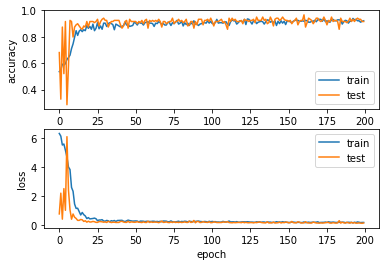

In [11]:
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(log.history['acc'])  
plt.plot(log.history['val_acc'])  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='lower right')  

# summarize history for loss
plt.subplot(212)  
plt.plot(log.history['loss'])  
plt.plot(log.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.show()  

In [12]:
# Carregar modelo salvo
# modelo = load_model("meuModelo.h5")
scores = modelo.evaluate(real_X, real_Y, verbose=0)
print("Accuracy: % .2f%%" % (scores[1]*100))

Accuracy:  92.94%
